In [2]:
!pip install pandas numpy statsmodels wquantiles seaborn


Import required Python packages.

In [3]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
from google.colab import files

uploaded = files.upload()

Saving state.csv to state.csv


Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [5]:
import pandas as pd

# Después de subir el archivo, estará disponible en el directorio actual
file_name = 'state.csv'

# Carga el archivo CSV en un DataFrame
STATE_CSV = pd.read_csv(file_name)

# Imprime el DataFrame para verificar que se ha cargado correctamente
print(STATE_CSV)

             State  Population  Murder.Rate Abbreviation
0          Alabama     4779736          5.7           AL
1           Alaska      710231          5.6           AK
2          Arizona     6392017          4.7           AZ
3         Arkansas     2915918          5.6           AR
4       California    37253956          4.4           CA
5         Colorado     5029196          2.8           CO
6      Connecticut     3574097          2.4           CT
7         Delaware      897934          5.8           DE
8          Florida    18801310          5.8           FL
9          Georgia     9687653          5.7           GA
10          Hawaii     1360301          1.8           HI
11           Idaho     1567582          2.0           ID
12        Illinois    12830632          5.3           IL
13         Indiana     6483802          5.0           IN
14            Iowa     3046355          1.9           IA
15          Kansas     2853118          3.1           KS
16        Kentucky     4339367 

# Estimates of Location
## Example: Location Estimates of Population and Murder Rates

In [7]:
# Table 1-2
state = STATE_CSV
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


Compute the mean, trimmed mean, and median for Population. For `mean` and `median` we can use the _pandas_ methods of the data frame. The trimmed mean requires the `trim_mean` function in _scipy.stats_.

In [8]:
state = STATE_CSV
print(state['Population'].mean())

6162876.3


In [9]:
print(trim_mean(state['Population'], 0.1))

4783697.125


In [10]:
print(state['Population'].median())

4436369.5


Weighted mean is available with numpy. For weighted median, we can use the specialised package `wquantiles` (https://pypi.org/project/wquantiles/).

In [11]:
print(state['Murder.Rate'].mean())

4.066


In [12]:
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


In [13]:
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


# Estimates of Variability

In [14]:
# Table 1-2
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


Standard deviation

In [15]:
print(state['Population'].std())

6848235.347401142


Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [16]:
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


Median absolute deviation from the median can be calculated with a method in _statsmodels_

In [17]:
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336


## Percentiles and Boxplots
_Pandas_ has the `quantile` method for data frames.

In [18]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [19]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


_Pandas_ provides a number of basic exploratory plots; one of them are boxplots

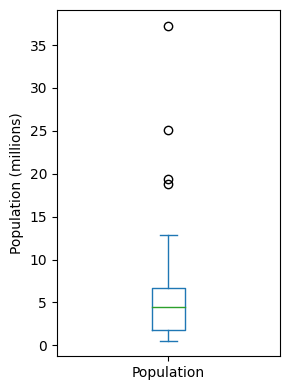

In [20]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

## Frequency Table and Histograms
The `cut` method for _pandas_ data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method `value_counts` returns a frequency table.

In [21]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


In [22]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

<ipython-input-22-f69b1d721bdb>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, subset in df.groupby(by='binnedPopulation'):


_Pandas_ also supports histograms for exploratory data analysis.